# manejamento de dados com dataset fifa 21

Esse trabalho tem como intuito a exploração e o manejamento de variáveis e dataframes.

## Lendo e escolhendo as variáveis:
Nesta fase do trabalho, foram importadas as bibliotecas necessárias, os dados foram carregados e o número de colunas foi verificado. Em seguida, foram selecionadas algumas variáveis que foram consideradas as mais importantes para fins de síntese. As variáveis escolhidas foram: nome, nome_completo, idade, data de nascimento, altura, peso, nacionalidade, clube, nome da liga e posição no ranking da liga.
## Propriedades do dataframe:
Na segunda parte, foram verificados os tipos de dados (dtypes) para garantir sua correção e a presença de valores ausentes. Optou-se por manter os valores ausentes neste caso.
## Criação de novas colunas:
Na terceira etapa, foram criadas 4 novas colunas utilizando informações completas de data de nascimento. A função split foi utilizada para separar os valores da data de nascimento e criar as colunas ano, dia e mês de nascimento. Além disso, com a informação de que o conjunto de dados é de 2021, foi possível calcular a idade dos jogadores. Utilizando a idade dos jogadores, foi gerado um gráfico boxplot para identificar a faixa etária em que a maioria dos jogadores se encontra, constatando-se que a maioria está na faixa etária entre 27 e 33 anos.
## Em quais países existe a concentração de maiores jogadores?
Nesta seção, foi utilizada outra fonte de dados para associar a nacionalidade de cada jogador ao seu respectivo continente e código alpha-3, utilizando a função map. Posteriormente, a função value_counts foi empregada para recuperar o número de jogadores por nacionalidade e os resultados foram plotados em um mapa mundi, revelando que as regiões próximas à Inglaterra concentram a maioria dos jogadores. Em seguida, a função groupby e agg foram utilizadas para calcular a porcentagem de jogadores por continente, constatando-se que mais de 50% dos jogadores estão na Europa, mais de 25% nas Américas, enquanto a Oceania, África e Ásia têm uma participação muito pequena.

## Média de altura dos jogadores X média de altura da população em geral?
Na última parte, foram utilizados dados de altura da população masculina de cada país para determinar se os jogadores são mais altos, em média, do que a população em geral. Segundo os dados analisados, os jogadores têm, em média, 5 cm a mais do que a população em geral.

# Dados:
O dataset principal foi retirado do site Kaggle com o nome "FIFA 21 complete player dataset". As bases de dados dispõem sobre os jogadores para o Modo Carreira do FIFA 21.

O segundo dataset, chamado "Country Mapping - ISO, Continent, Region", serviu para mapear os continentes e códigos ISO com cada país, também foi retirado do site Kaggle.

O terceiro dataset dispõe sobre a altura da população masculina em média, foi retirado do site WorldData e serviu para descobrir se os jogadores são mais altos que a população em geral.

# Lendo e escolhendo as variáveis

In [58]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
import plotly.graph_objects as go
from IPython.display import Image

In [59]:
data = pd.read_excel(r"C:\Users\joao\Desktop\modelos\fifa21\Career Mode player datasets - FIFA 15-21.xlsx")

In [60]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [61]:
data.columns[:60]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 

O dataframe possui 106 colunas. Por preferência e síntese, irei utilizar apenas algumas e chamarei o novo dataframe com essas colunas de 'dataresumo'.

In [62]:
dataresumo = data[['short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank']]

In [63]:
dataresumo

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank
0,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0
2,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0
3,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0
4,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,German 1. Bundesliga,1.0
...,...,...,...,...,...,...,...,...,...,...
16150,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,English League Two,4.0
16151,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,English League Two,4.0
16152,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,Polish T-Mobile Ekstraklasa,1.0
16153,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,English League One,3.0


Irei mudar o nome das colunas para ficarem mais legíveis.

In [64]:
colunas = ['nome' , 'nome_completo' , 'idade' , 'data_de_nascimento' , 'altura' , 'peso' , 'nacionalidade' , 'clube' , 'nome_da_liga' , 'rank_na_liga']

In [65]:
dataresumo.columns = colunas

# Propriedades do dataframe

In [66]:
dataresumo.head()

,nome,nome_completo,idade,data_de_nascimento,altura,peso,nacionalidade,clube,nome_da_liga,rank_na_liga
0,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0
2,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0
3,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0
4,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,German 1. Bundesliga,1.0


Vamos conferir se os dtypes estão corretos em cada coluna.

In [67]:
dataresumo.dtypes

nome                          object
nome_completo                 object
idade                          int64
data_de_nascimento    datetime64[ns]
altura                         int64
peso                           int64
nacionalidade                 object
clube                         object
nome_da_liga                  object
rank_na_liga                 float64
dtype: object

Os dtypes estão corretos em cada coluna. Agora vamos conferir se há ausência de valores em alguma coluna.

In [68]:
dataresumo.isnull().sum()

nome                    0
nome_completo           0
idade                   0
data_de_nascimento      0
altura                  0
peso                    0
nacionalidade           0
clube                 239
nome_da_liga          239
rank_na_liga          239
dtype: int64

Como visto acima, existem valores ausentes nas colunas 'clube', 'nome_da_liga' e 'rank_da_liga'. Uma intuição é que, como esses valores coincidem em todas as linhas, faz sentido que um jogador sem clube também não participe de nenhuma liga e também não possua ranking na liga. Como esses valores não podem ser preenchidos, decidi mantê-los e também não utilizar a função drop.

# Criação de novas colunas

Podemos separar a data de nascimento em colunas de dia, mês e ano de nascimento. Sabendo que o dataset é de 2021, podemos calcular a idade dos jogadores e descobrir em qual idade se encontra a maioria dos jogadores.

In [69]:
dataresumo['data_de_nascimento']

0       1987-06-24
1       1985-02-05
2       1984-01-23
3       1981-10-03
4       1986-03-27
           ...    
16150   1996-09-26
16151   1997-06-01
16152   1995-07-10
16153   1992-04-18
16154   1973-01-14
Name: data_de_nascimento, Length: 16155, dtype: datetime64[ns]

Como a data de nascimento é separada por '-', podemos usar a função split para separar essa data em três partes: a primeira sendo o ano, a segunda o mês e a terceira o dia. Em seguida, iremos transformar essas novas colunas em um dtype apropriado (int) e então criar uma nova coluna com a idade dos jogadores.

In [70]:
ano = dataresumo['data_de_nascimento'].astype(str).str.split('-').str[0]

In [71]:
mes = dataresumo['data_de_nascimento'].astype(str).str.split('-').str[1]

In [72]:
dia = dataresumo['data_de_nascimento'].astype(str).str.split('-').str[2]

In [73]:
dataresumo['ano_nas'] = ano
dataresumo['mes_nas'] = mes
dataresumo['dia_nas'] = dia
dataresumo['ano_nas'] = dataresumo['ano_nas'].astype(int)
dataresumo['mes_nas'] = dataresumo['mes_nas'].astype(int)
dataresumo['dia_nas'] = dataresumo['dia_nas'].astype(int)

In [74]:
dataresumo['idade'] = 2021 - dataresumo['ano_nas']

E as colunas ficaram assim: 
ano_nas corresponde ao ano de nascimento; 
mes_nas correponde ao mes de nascimento; 
dia_nas corresponde ao dia de nascimento; 
e idade corresponde a idade; 

In [75]:
dataresumo[['nome' , 'ano_nas' , 'mes_nas' , 'dia_nas' , 'idade']]

,nome,ano_nas,mes_nas,dia_nas,idade
0,L. Messi,1987,6,24,34
1,Cristiano Ronaldo,1985,2,5,36
2,A. Robben,1984,1,23,37
3,Z. Ibrahimović,1981,10,3,40
4,M. Neuer,1986,3,27,35
...,...,...,...,...,...
16150,E. Redman,1996,9,26,25
16151,A. Collins,1997,6,1,24
16152,P. Żemło,1995,7,10,26
16153,T. Davies,1992,4,18,29


Podemos agora verificar em qual idade a maioria dos jogadores está concentrada.

In [76]:
idade_count = pd.DataFrame(dataresumo['idade'].value_counts()).sort_values(by='idade')

In [77]:
idade_count['idade'] = idade_count.index

Text(0, 0.5, 'Quantidade de jogadores')

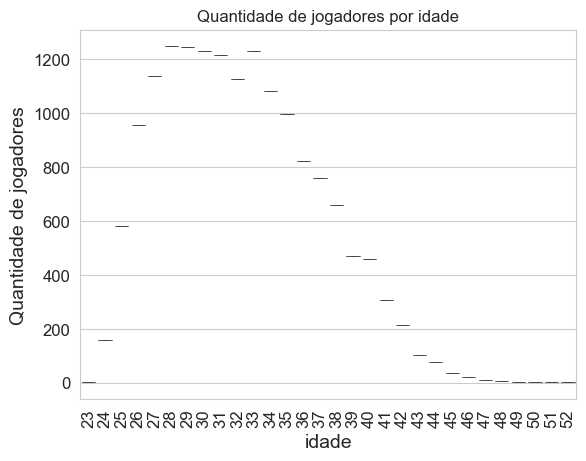

In [78]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = idade_count, x = 'idade' , y = 'count' , linewidth=0.5)
x=plt.xticks(rotation=90)
ax.set_title('Quantidade de jogadores por idade')
plt.ylabel ('Quantidade de jogadores')

A idade da maioria dos jogadores se concentra entre 27 e 33 anos; em seguida, há uma diminuição. Essa faixa etária pode indicar uma melhor combinação de habilidade e desempenho físico.

# Em quais países existe a concentração de maiores jogadores?

Nessa parte, vou utilizar um banco de dados do site Kaggle chamado 'Country Mapping - ISO, Continent, Region'. Com esse banco de dados, vamos buscar o identificador alpha-3, assim como o continente. Com o identificador alpha-3, vamos plotar no mapa mundi a quantidade de jogadores por país e verificar quais regiões possuem maior densidade de jogadores. Também vamos usar o continente para verificar a porcentagem de jogadores por continente.

In [79]:
datacontinentes = pd.read_csv(r"C:\Users\joao\Desktop\modelos\fifa21\continents2.csv")

datacontinentes refere-se ao banco de dados 'Country Mapping - ISO, Continent, Region'. Esse dataframe possui 11 colunas, mas iremos utilizar apenas as colunas 'alpha-3' e 'region'.

In [80]:
datacontinentes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


Agora iremos criar dois dicionários: 'pais_suf' que possui uma chave referente ao país e um valor referente ao código alpha-3 daquele país; 'pais_cont' também possui uma chave referente ao país, mas o valor é referente ao continente. Em seguida, iremos usar esses dicionários para mapear e criar duas novas colunas no dataframe original 'dataresumo', contendo o continente e a chave alpha-3. Para isso, usarei um loop for pelo tamanho do dataframe 'datacontinentes' e, em seguida, pegarei cada chave e valor usando a função iloc.

In [81]:
pais_suf = {}
pais_cont = {}
for i in range(len(datacontinentes)):
    pais_suf[datacontinentes.iloc[i,0]] = datacontinentes.iloc[i,2]
    pais_cont[datacontinentes.iloc[i,0]] = datacontinentes.iloc[i,5]
    

Agora iremos mapear com o dataframe original.

In [82]:
dataresumo['continente'] = dataresumo['nacionalidade'].map(pais_cont)
dataresumo['id'] = dataresumo['nacionalidade'].map(pais_suf)

Podemos visualizar como ficou mapeado no dataframe original 'dataresumo'. Agora a coluna da nacionalidade possui uma correspondente 'id', que se refere ao código alpha-3, e também uma coluna para o continente.

In [83]:
dataresumo.iloc[:,[6,-1,-2]]

,nacionalidade,id,continente
0,Argentina,ARG,Americas
1,Portugal,PRT,Europe
2,Netherlands,NLD,Europe
3,Sweden,SWE,Europe
4,Germany,DEU,Europe
...,...,...,...
16150,Wales,NaN,NaN
16151,Wales,NaN,NaN
16152,Poland,POL,Europe
16153,England,NaN,NaN


Com essas informações, agora podemos verificar a distribuição de jogadores por país. Irei criar um novo dataframe chamado 'dataresumo_j', obter a quantidade de jogadores por nacionalidade usando a função value_counts(), e criar novas colunas com o país e a quantidade de jogadores. Em seguida, irei mapear novamente os valores alpha-3 na coluna 'id'.

In [84]:
dataresumo_j = pd.DataFrame()

In [85]:
dataresumo_j['pais'] = dataresumo['nacionalidade'].value_counts().index.values
dataresumo_j['quantidade_de_jogadores'] = dataresumo['nacionalidade'].value_counts().values

In [86]:
dataresumo_j['id'] = dataresumo_j['pais'].map(pais_suf)

In [87]:
dataresumo_j

,pais,quantidade_de_jogadores,id
0,England,1627,NaN
1,Spain,1051,ESP
2,France,958,FRA
3,Argentina,867,ARG
4,Italy,795,ITA
...,...,...,...
144,Kyrgyzstan,1,KGZ
145,Fiji,1,FJI
146,Saint Lucia,1,LCA
147,Montserrat,1,MSR


Então iremos verificar se há valores alpha-3 faltando em 'id'. Como existem valores ausentes, irei corrigir manualmente os três primeiros pela quantidade de jogadores. Farei isso adicionando as chaves e valores para mapear novamente. Logo em seguida, irei remover as linhas que possuem algum valor ausente.

In [88]:
dataresumo_j[dataresumo_j['id'].isnull()]

,pais,quantidade_de_jogadores,id
0,England,1627,NaN
7,Republic of Ireland,460,NaN
18,Korea Republic,328,NaN
19,Scotland,323,NaN
28,Wales,118,NaN
32,Northern Ireland,91,NaN
35,Ivory Coast,86,NaN
49,Bosnia Herzegovina,42,NaN
55,DR Congo,38,NaN
65,North Macedonia,25,NaN


Estes são os países que não possuem identificação. Iremos corrigir os 3 primeiros manualmente e remover as outras linhas.

In [89]:
pais_suf['England'] = 'GBR'
pais_suf['Republic of Ireland'] = 'IRL'
pais_suf['Korea Republic'] = 'KOR'

In [90]:
dataresumo_j['id'] = dataresumo_j['pais'].map(pais_suf)

In [91]:
daresumo_j = dataresumo_j.dropna()

Agora, com esse dataframe, podemos plotar no mapa mundi, correlacionando a quantidade de jogadores por país com os países no gráfico.

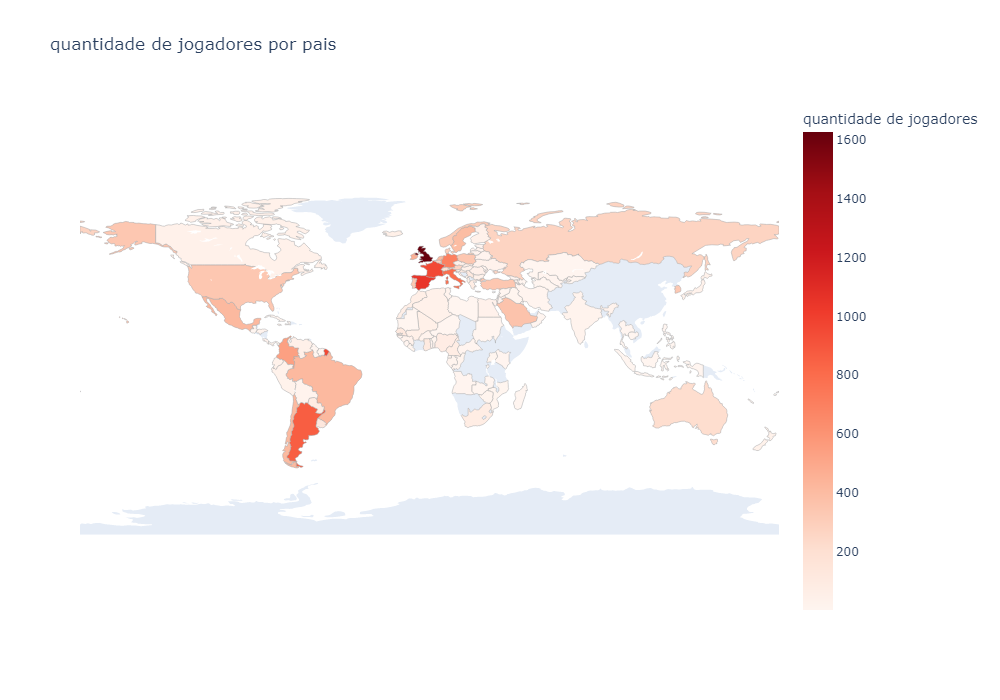

In [92]:
fig = go.Figure(data=go.Choropleth(
locations = dataresumo_j['id'],
z = dataresumo_j['quantidade_de_jogadores'],
text = dataresumo_j['pais'],
colorscale = 'Reds',
autocolorscale=False,
reversescale=False,
marker_line_color='darkgray',
marker_line_width=0.5,
colorbar_title = 'quantidade de jogadores',
))
fig.update_layout(
title_text='quantidade de jogadores por pais',
geo=dict(
showframe=False,
showcoastlines=False,
projection_type='equirectangular'))
Image(fig.to_image(format="png", width=1000, height=700))

Pelo gráfico, suspeitamos que a maior parte dos jogadores se concentra no continente europeu. Podemos confirmar isso usando a função groupby e agg do pandas.

In [93]:
jogadores_por_cont = dataresumo.groupby('continente').agg({'nacionalidade' : lambda x : x.value_counts().sum()})

In [94]:
jogadores_por_cont
jogadores_por_cont_frame = pd.DataFrame()
jogadores_por_cont_frame['Quantidade de jogadores'] = jogadores_por_cont['nacionalidade'].values
jogadores_por_cont_frame['Continente'] = jogadores_por_cont.index
jogadores_por_cont_frame['Quantidade de jogadores em %'] = (jogadores_por_cont_frame['Quantidade de jogadores']/jogadores_por_cont_frame['Quantidade de jogadores'].sum())*100

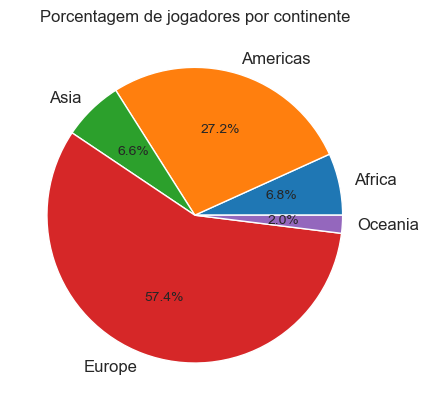

In [95]:
plt.pie(jogadores_por_cont_frame['Quantidade de jogadores em %'] , labels = jogadores_por_cont_frame['Continente'], autopct = '%1.1f%%')
plt.title('Porcentagem de jogadores por continente')
plt.show()

Como esperado, mais da metade dos jogadores se concentra na Europa, e a quantidade restante está quase totalmente nas Américas. Ásia, África e Oceania possuem uma participação muito pequena de jogadores de acordo com os dados deste DataFrame.

# Média de altura dos jogadores X média de altura da população em geral?

Podemos verificar se a média de altura dos jogadores é maior do que a média de altura da população em geral, já que um corpo maior pode contribuir para melhor desempenho ao cabecear, chutar ou até mesmo agarrar a bola. Para isso, obtive os dados de altura do site 'worlddata' e os relacionei mapeando com o dataframe original, como feito anteriormente.

In [96]:
peso_alt = pd.read_excel(r"C:\Users\joao\Desktop\modelos\fifa21\peso_alt_pais.xlsx")

In [97]:
peso_alt

,Country,Unnamed: 1,Average height,Weight,BMI
0,Netherlands,NaN,1.84 m,87.9 kg,26.1
1,Montenegro,NaN,1.83 m,90.4 kg,27.0
2,Estonia,NaN,1.82 m,89.9 kg,27.0
3,Denmark,NaN,1.82 m,86.8 kg,26.3
4,Bosnia and Herzegovina,NaN,1.82 m,87.1 kg,26.4
...,...,...,...,...,...
121,Nepal,NaN,1.64 m,60.5 kg,22.5
122,Guatemala,NaN,1.64 m,69.1 kg,25.7
123,Yemen,NaN,1.63 m,62.5 kg,23.6
124,Laos,NaN,1.62 m,59.5 kg,22.6


In [98]:
pais_altura = {}
pais_peso = {}
for i in range(len(peso_alt)):
    pais_altura[peso_alt.iloc[i,0]] = peso_alt.iloc[i,2]
    pais_peso[peso_alt.iloc[i,0]] = peso_alt.iloc[i,3]

In [99]:
dataresumo['altura_med_nacional'] = dataresumo['nacionalidade'].map(pais_altura)
dataresumo['peso_med_nacional'] = dataresumo['nacionalidade'].map(pais_peso)

In [100]:
dataresumo[['nome' , 'altura' , 'peso' , 'altura_med_nacional' , 'peso_med_nacional']]

,nome,altura,peso,altura_med_nacional,peso_med_nacional
0,L. Messi,169,67,1.74 m,84.7 kg
1,Cristiano Ronaldo,185,80,1.74 m,79.5 kg
2,A. Robben,180,80,1.84 m,87.9 kg
3,Z. Ibrahimović,195,95,1.80 m,87.1 kg
4,M. Neuer,193,92,1.80 m,88.7 kg
...,...,...,...,...,...
16150,E. Redman,187,81,NaN,NaN
16151,A. Collins,178,57,NaN,NaN
16152,P. Żemło,190,76,1.80 m,89.0 kg
16153,T. Davies,180,70,NaN,NaN


Agora vamos transformar os valores de altura_med_nacional e peso_med_nacional em float, elimando o 'm' e o 'kg' com a função split, também iremos dropar as colunas faltantes

In [101]:
dataresumo['altura_med_nacional'] = dataresumo['altura_med_nacional'].str.split(' ').str[0]
dataresumo['peso_med_nacional'] = dataresumo['peso_med_nacional'].str.split(' ').str[0]

In [102]:
data_peso_alt = dataresumo[['nome' , 'altura' , 'peso' , 'altura_med_nacional' , 'peso_med_nacional']].copy()

In [103]:
data_peso_alt = data_peso_alt.dropna()

Agora iremos imprimir a média de altura dos jogadores e, em seguida, a média de altura da população em geral. Essa média de altura da população em geral faz sentido em termos comparativos, já que para cada jogador de cada nacionalidade haverá um valor de mesmo peso para a altura média dos homens daquela nacionalidade. Então, por exemplo, na média de altura dos jogadores entra o Messi com 169 cm e também um valor correspondente à altura média dos homens daquele país, no caso 174 cm, que corresponde à altura média do homem argentino.

In [104]:
print('A média de altura dos jogadores por país é: ' + str(data_peso_alt['altura'].mean()))

A média de altura dos jogadores por país é: 181.0111805327195


In [105]:
data_peso_alt['altura_med_nacional'] = data_peso_alt['altura_med_nacional'].str.replace('.' , '').astype(int)

In [106]:
data_peso_alt['altura_med_nacional'].mean()
print('A média de altura dos homens por país é: ' + str(data_peso_alt['altura_med_nacional'].mean()))

A média de altura dos homens por país é: 176.21612956264386


In [107]:
dif_alt = (data_peso_alt['altura'].mean() - data_peso_alt['altura_med_nacional'].mean())
print('A média de altura dos jogadores é : ' + str(dif_alt)[:4] + ' cm mais alta')

A média de altura dos jogadores é : 4.79 cm mais alta


Foi constatado que, em média, os jogadores têm 4.79 centímetros a mais que a população em geral dos homens, o que corrobora com as hipóteses levantadas sobre as vantagens de ser mais alto.

# Conclusão:

Este trabalho serviu para demonstrar como manipular variáveis e dataframes para extrair informações. Primeiramente, foi realizada uma inspeção no número de variáveis do dataframe, verificando os dtypes e identificando os valores ausentes. Em seguida, utilizei as funções split para criar novas colunas com a data de nascimento de cada jogador e sua idade, e descobrimos que a maioria dos jogadores está concentrada entre 27 e 33 anos. Também, ao combinar as informações de um novo dataframe, pudemos plotar onde a maioria dos jogadores se concentra, tanto em termos de país quanto de continente. Finalmente, descobrimos que, em média, os jogadores são 5 cm mais altos do que a população em geral.